In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import style

sns.set()

In [24]:
raw = pd.read_csv('Dummies.csv')
raw

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


# Dealing with dummies

In [25]:
data = raw.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1 , 'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


# Regression itself

In [26]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.19e-15
Time:                        22:02:48   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

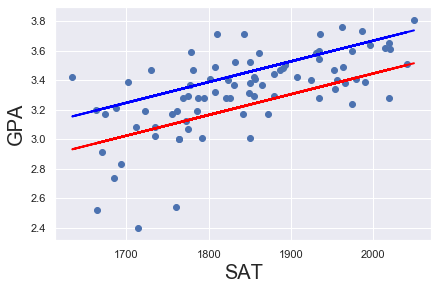

In [27]:
plt.scatter(data['SAT'] , y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.6439 + 0.2226 + 0.0014*data['SAT']

# style.use('fivethirtyeight')
fig = plt.plot(data['SAT'] , yhat_no , lw =2 , c = 'red')
fig = plt.plot(data['SAT'] , yhat_yes , lw =2 , c = 'blue')
plt.xlabel('SAT' , fontsize = 20)
plt.ylabel('GPA' , fontsize = 20)
plt.show()

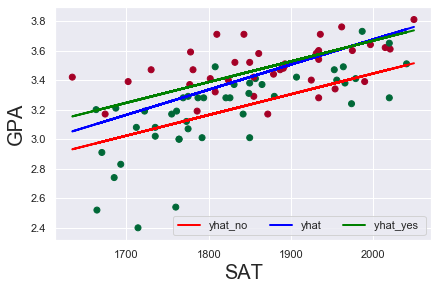

In [28]:
plt.scatter(data['SAT'] , y , c = data['Attendance'] , cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.6439 + 0.2226 + 0.0014*data['SAT']
yhat = 0.275 + 0.0017*data['SAT']

fig = plt.plot(data['SAT'] , yhat_no , lw =2 , c = 'red')
fig = plt.plot(data['SAT'] , yhat , lw =2 , c = 'blue')
fig = plt.plot(data['SAT'] , yhat_yes , lw =2 , c = 'green')
plt.xlabel('SAT' , fontsize = 20)
plt.ylabel('GPA' , fontsize = 20)
plt.legend(['yhat_no', 'yhat' ,'yhat_yes '] ,ncol=3,loc='lower right')
plt.show()

# Making predictions

In [29]:
new = pd.DataFrame({'const':1 , 'SAT':[1700,1670] , 'Attendance':[0,1]})
new = new[['const' , 'SAT' , 'Attendance']]
new

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [31]:
new.rename(index = {0:'Tom',1:'Jerry'})


,const,SAT,Attendance
Tom,1,1700,0
Jerry,1,1670,1


In [34]:
predictions = results.predict(new)
predictiond = pd.DataFrame({'Predictions':predictions})
joined = new.join(predictiond)
joined.rename(index = {0:'Tom',1:'Jerry'})

,const,SAT,Attendance,Predictions
Tom,1,1700,0,3.023513
Jerry,1,1670,1,3.204163
